Computing 2D Principle Components
Accuracy: 0.948571428571
Plotting...


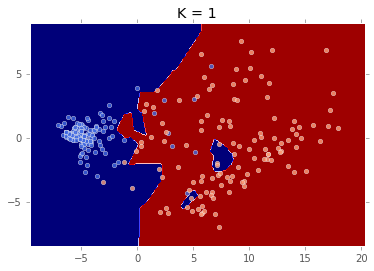

Accuracy: 0.94
Plotting...


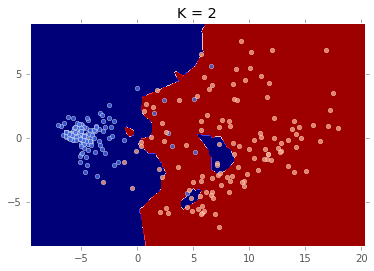

Accuracy: 0.962857142857
Plotting...


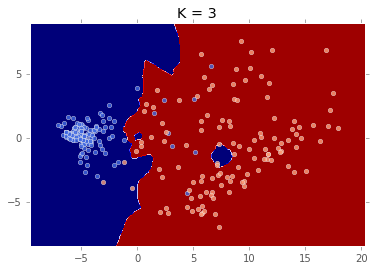

Accuracy: 0.951428571429
Plotting...


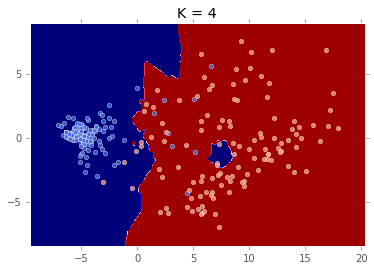

Accuracy: 0.965714285714
Plotting...


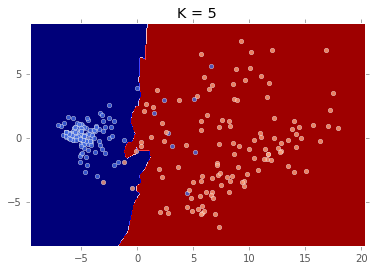

Accuracy: 0.965714285714
Plotting...


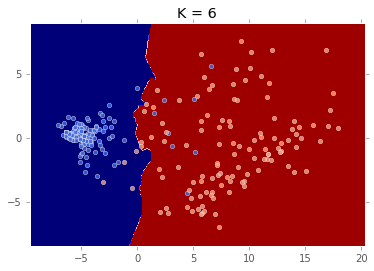

Accuracy: 0.965714285714
Plotting...


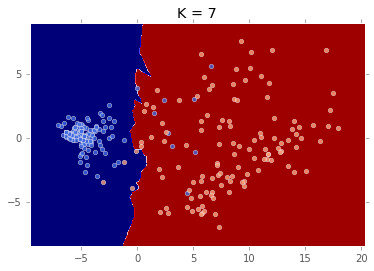

Accuracy: 0.962857142857
Plotting...


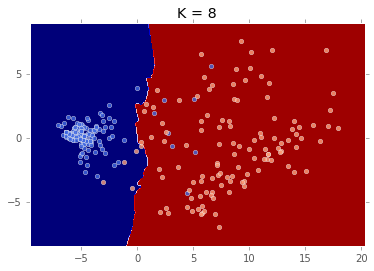

Accuracy: 0.965714285714
Plotting...


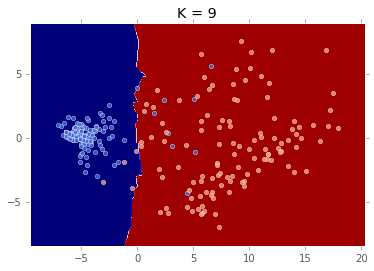

Accuracy: 0.96
Plotting...


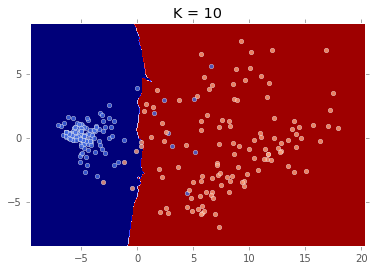

Accuracy: 0.962857142857
Plotting...


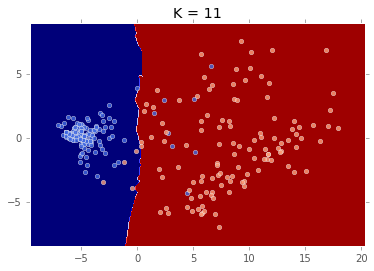

Accuracy: 0.96
Plotting...


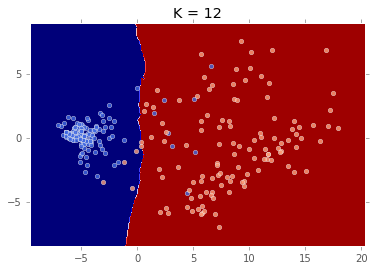

Accuracy: 0.957142857143
Plotting...


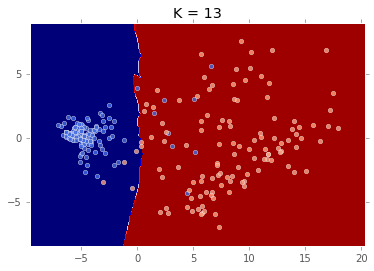

Accuracy: 0.957142857143
Plotting...


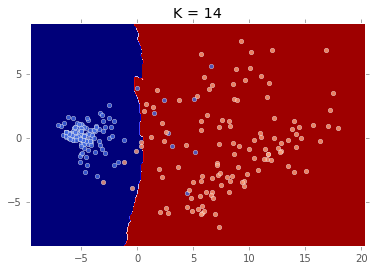

In [14]:
import pandas as pd

# If you'd like to try this lab with PCA instead of Isomap,
# as the dimensionality reduction technique:
Test_PCA = True


def plotDecisionBoundary(model, X, y):
  print "Plotting..."
  import matplotlib.pyplot as plt
  import matplotlib
  matplotlib.style.use('ggplot') # Look Pretty

  fig = plt.figure()
  ax = fig.add_subplot(111)

  padding = 0.1
  resolution = 0.1

  #(2 for benign, 4 for malignant)
  colors = {2:'royalblue',4:'lightsalmon'} 

  
  # Calculate the boundaris
  x_min, x_max = X[:, 0].min(), X[:, 0].max()
  y_min, y_max = X[:, 1].min(), X[:, 1].max()
  x_range = x_max - x_min
  y_range = y_max - y_min
  x_min -= x_range * padding
  y_min -= y_range * padding
  x_max += x_range * padding
  y_max += y_range * padding

  # Create a 2D Grid Matrix. The values stored in the matrix
  # are the predictions of the class at at said location
  import numpy as np
  xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                       np.arange(y_min, y_max, resolution))

  # What class does the classifier say?
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  # Plot the contour map
  plt.contourf(xx, yy, Z, cmap=plt.cm.seismic)
  plt.axis('tight')

  # Plot your testing points as well...
  for label in np.unique(y):
    indices = np.where(y == label)
    plt.scatter(X[indices, 0], X[indices, 1], c=colors[label], alpha=0.8)

  p = model.get_params()
  plt.title('K = ' + str(p['n_neighbors']))
  plt.show()


# 
# TODO: Load in the dataset, identify nans, and set proper headers.
# Be sure to verify the rows line up by looking at the file in a text editor.
#
# .. your code here ..
headers = ['sample', 'thickness', 'size', 'shape', 'adhesion', 'epithelial', 'nuclei', 'chromatin', 'nucleoli', 'mitoses', 'status']
df = pd.read_csv("datasets/brestcancer.data", names=headers)
df.head()
# 
# TODO: Copy out the status column into a slice, then drop it from the main
# dataframe. You can also drop the sample column, since that doesn't provide
# us with any machine learning power.
#
# .. your code here ..
status = df.status
df.drop(['status', 'sample'], axis=1, inplace=True)

#
# TODO: With the labels safely extracted from the dataset, replace any nan values
# with the mean feature / column value
#
# .. your code here ..
label = status.fillna(status.mean())


#
# TODO: Do train_test_split. Use the same variable names as on the EdX platform in
# the reading material, but set the random_state=7 for reproduceability, and keep
# the test_size at 0.5 (50%).
#
# .. your code here ..
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.5, random_state=7)



#
# TODO: Experiment with the basic SKLearn preprocessing scalers. We know that
# the features consist of different units mixed in together, so it might be
# reasonable to assume feature scaling is necessary. Print out a description
# of the dataset, post transformation.
#
# .. your code here ..
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler().fit_transform(X_train)
X_train.describe()


#
# PCA and Isomap are your new best friends
model = None
if Test_PCA:
  print "Computing 2D Principle Components"
  #
  # TODO: Implement PCA here. save your model into the variable 'model'.
  # You should reduce down to two dimensions.
  #
  # .. your code here ..
  from sklearn.decomposition import PCA
  pca = PCA(n_components=2)
  pca.fit(X_train)
  X_train = pca.transform(X_train)
  X_test  = pca.transform(X_test)
else:
  print "Computing 2D Isomap Manifold"
  #
  # TODO: Implement Isomap here. save your model into the variable 'model'
  # Experiment with K values from 5-10.
  # You should reduce down to two dimensions.
  #
  # .. your code here ..
  from sklearn.manifold import isomap
  isomap = isomap()
  isomap.fit(X_train)
  X_train = isomap.transform(X_train)
  X_test  = isomap.transform(X_test)


# 
# TODO: Implement and train KNeighborsClassifier on your projected 2D
# training data here. You can use any K value from 1 - 15, so play around
# with it and see what results you can come up. Your goal is to find a
# good balance where you aren't too specific (low-K), nor are you too
# general (high-K). You should also experiment with how changing the weights
# parameter affects the results.
#
# .. your code here ..
from sklearn.neighbors import KNeighborsClassifier
for k in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    from sklearn.metrics import accuracy_score
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print "Accuracy:", score
    plotDecisionBoundary(knn, X_test, y_test)

# HINT: Ensure your KNeighbors classifier object from earlier is called 'knn'

#
# INFO: Be sure to always keep the domain of the problem in mind! It's
# WAY more important to errantly classify a benign tumor as malignant,
# and have it removed, than to incorrectly leave a malignant tumor, believing
# it to be benign, and then having the patient progress in cancer. Since the UDF
# weights don't give you any class information, the only way to introduce this
# data into SKLearn's KNN Classifier is by "baking" it into your data. For
# example, randomly reducing the ratio of benign samples compared to malignant
# samples from the training set.

#
# TODO: Calculate + Print the accuracy of the testing set
#
# .. your code here ..
%matplotlib inline